# Data Importation

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Load dataset
pengiuns_df = sns.load_dataset("penguins")
pengiuns_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
# Brief overview of the data
pengiuns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
pengiuns_df.dropna(inplace=True)
pengiuns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
# Check for duplicates
pengiuns_df.duplicated().sum()

0

Null values have been removed and the dataset doesn't contain any duplicates. Some EDA will be performed to get a better understanding of the dataset.

# Data Exploration

In [6]:
# Extracting numeric columns from dataset
numeric_df = pengiuns_df.select_dtypes(include="float64")
numeric_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


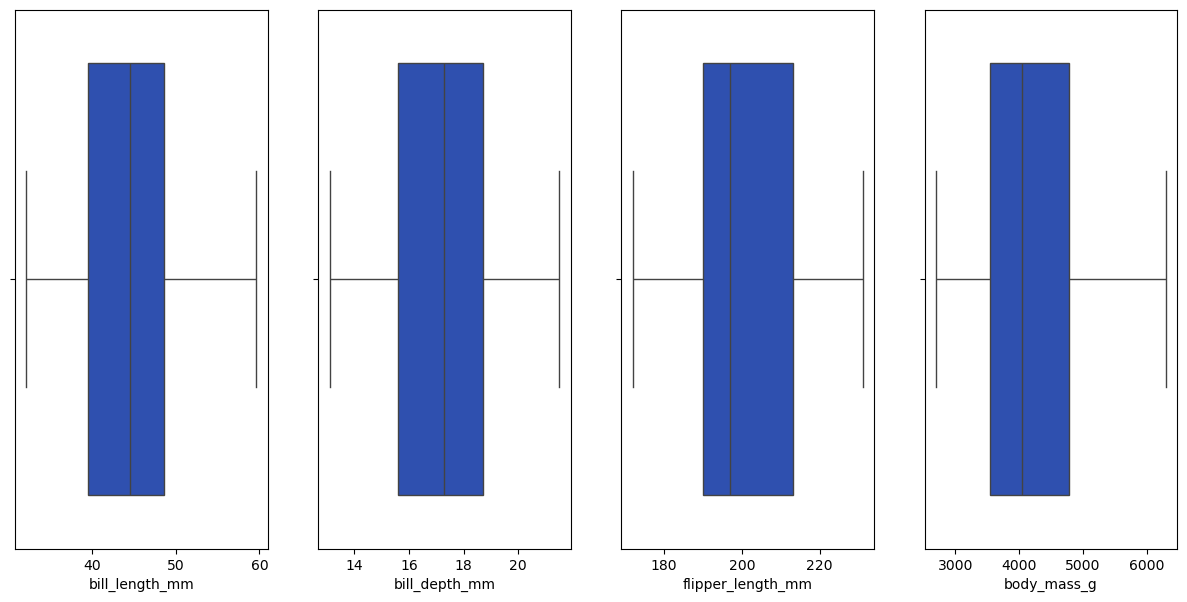

In [19]:
# Plot boxplot to identify if any outliers are present

fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for idx, col in enumerate(numeric_df.columns):
    sns.boxplot(x=col, data=pengiuns_df, color="#1a46c4", ax=ax[idx])
    ax[idx].set(xlabel=col)

plt.show()

The data doesn't contain any outliers.

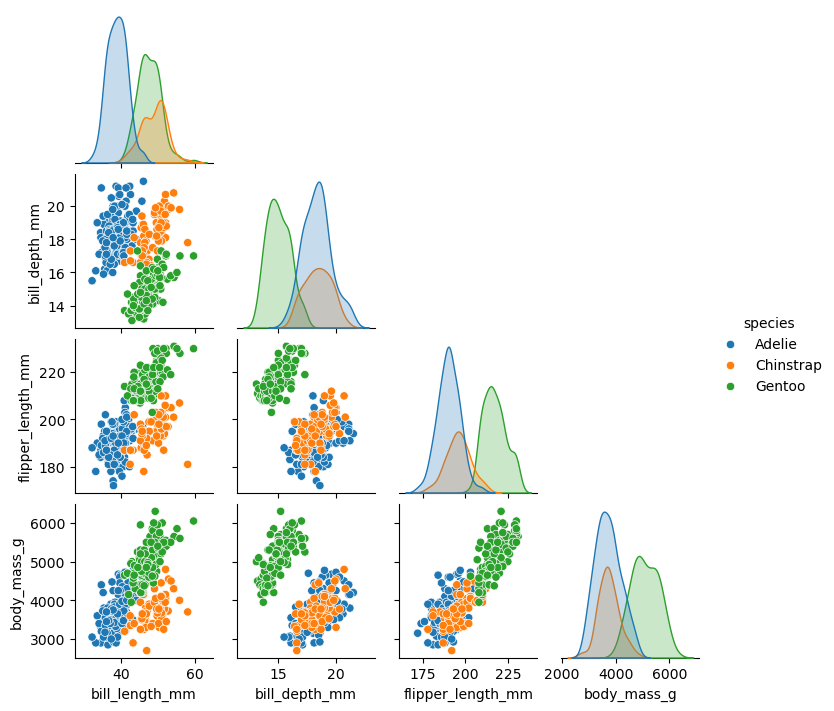

In [8]:
# Plot features against each other to identify correlations
sns.pairplot(data=pengiuns_df, hue="species", height=1.8, corner=True)

> When observing each species individually, their features generally have a **linear relationship**. There are special cases, when there's a larger number of penguins in a small area, this can be seen as the average size for that species and deviation from the observed linearity between features, such as the Adelie penguin, where the points for flipper length and bill length move upwards rather than diagonally.


# Data Preprocessing and Modelling

The dataset contains columns with large difference in scales. This means that feature standard scaling will be conduct before moving onto dimenstationality reduction

In [9]:
# Standardisation of the feautures

scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

In [10]:
# Instantiating prinicpal components
pca = PCA()

pca.fit_transform(scaled_df)

array([[-1.85359302,  0.03206938, -0.23490166,  0.52839663],
       [-1.31625406, -0.44352677, -0.02747008,  0.40172663],
       [-1.37660509, -0.16123048,  0.18968926, -0.5286619 ],
       ...,
       [ 2.75150503,  0.26655572, -0.4193065 ,  0.23625562],
       [ 1.71385366, -0.72587516, -0.26276382,  0.33000361],
       [ 2.01853683,  0.33655372, -0.15533072,  0.43880173]])

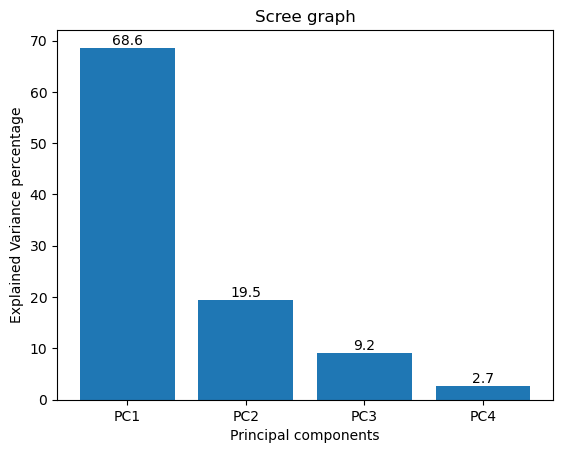

In [11]:
# Get percentage labels
percentage_variance = np.round(pca.explained_variance_ratio_ * 100, 1)
labels = [f"PC{x}" for x in range(1, len(percentage_variance)+1)]

# Plot principal components against percenatge variance
graph = plt.bar(x=range(1, len(percentage_variance)+1), height=percentage_variance, tick_label=labels)
plt.bar_label(graph)
plt.ylabel("Explained Variance percentage")
plt.xlabel("Principal components")
plt.title("Scree graph")
plt.show()

In [12]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cum_var = map(lambda x:x*100, cumulative_variance)
list(cum_var)

[68.63389313599902, 88.08682242049917, 97.30288540858751, 99.99999999999999]

A threshold of 97% will be selected this means that the first three principal components will be used to represent most of the variance.

In [13]:
# Instaintiate pca with 3 principal components
pca = PCA(n_components=3)

In [14]:
pc_scores = pca.fit_transform(scaled_df)

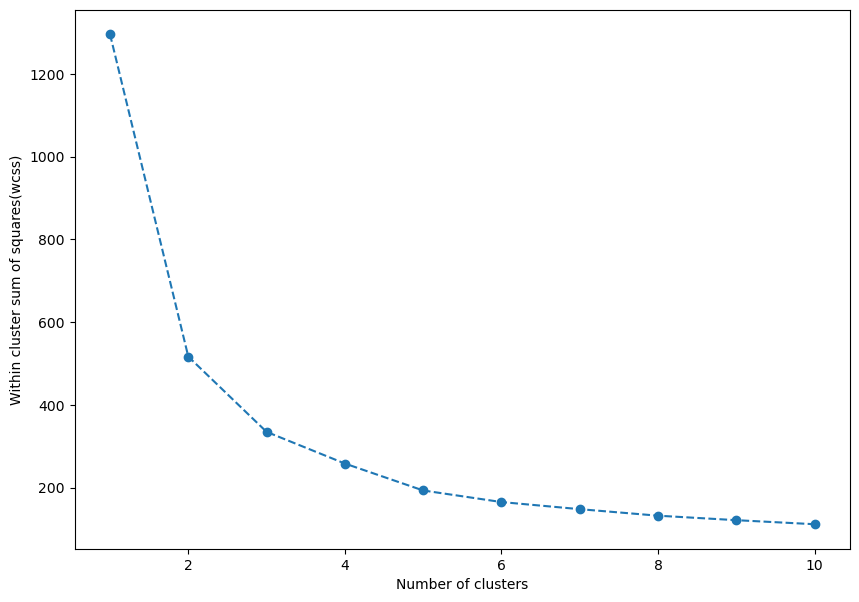

In [15]:
# Finding number of clusters for KMeans  model
wcss = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    kmeans.fit(pc_scores)
    wcss.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1,11), wcss, marker="o", linestyle="--")
plt.ylabel("Within cluster sum of squares(wcss)")
plt.xlabel("Number of clusters")
plt.show()


The graph elbows at 3 clusters. This will be used to instanstiate the KMeans model.

In [16]:
# Instanstiate new kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

In [17]:
# Fit model to pc dataset 
label = kmeans.fit_predict(pc_scores)

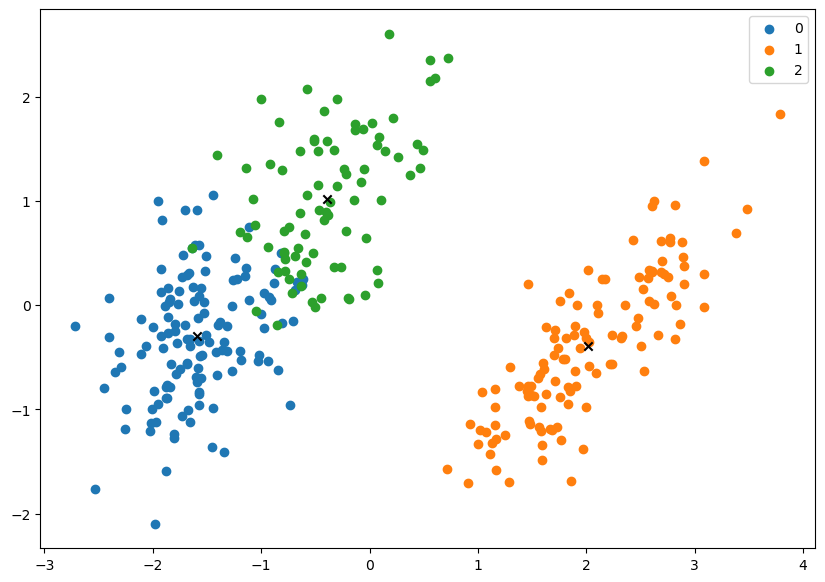

In [18]:
# Plt scatterplot of clusters
centroids = np.array(kmeans.cluster_centers_)
plt.figure(figsize=(10,7))
unique_labels = np.unique(label)
for i in unique_labels:
   plt.scatter(pc_scores[label == i , 0] , pc_scores[label == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

# Conclusion

1. Three principal components were selected to achieve 97% explained variance. Experimentation with two principal components with an explained variance of 88% resulted in the same scatterplot.
2. Based of the elbow graph, three clusters were selected. Again experimentation with two clusters produced the same shaped scatterplot with the green and blue clusters now forming one cluster.
3. The data points on the scatterplot are dispersed with some outliers. This was also seen in the features pairplot, were some data points were further away from the cluster.